# Sauty Solution

A slightly different condition occurs when the constituient is added at x=0 at a constant rate.
The figure below depicts the physical system, and the analytical model system at three different times.

![](sautysetup.png)

**Panel A** is a depiction of the physical system and the concentration profile along the x-axis at time less than zero. The concentration is zero everywhere. An injection supply is depicted by the small reservoir and the injection path into the aquifer (or stream). The valve is closed in this panel.

**Panel B** is a depection of the physical system and the concentration profile along the x-axis at time equal zero (like the Big Bang!). At t=0, mass is added into the aquifer (stream) at a rate CoQ at the origin (x=0). This mass flow rate at the injection site is maintained from t=0 onward.

**Panel C** is a depiction of the physical system and the concentration profile along the x-axis at some time greater than zero. The concentration front translates to the right of the origin a distance determined by the species velocity and dispersed along the front proportional to the dispersivity in the system. Some mass disperses upstream from the injection site.

The analytical solution (Sauty, 1980) for this situation is: 

$$ C(x,t) = \frac{C_0 Q}{2 n v}exp(\frac{xv}{2D})[exp(\frac{|x|v}{2D}) \cdot erfc(\frac{|x|-vt}{2\sqrt{Dt}})- exp(\frac{|x|v}{2D}) \cdot erfc(\frac{|x|+vt}{2\sqrt{Dt}})]$$

The solution is applicable for porous media flow, where the velocity is the pore velocity (seepage velocity divided by the porosity). 

## Concentration Profile

The example below uses a function named `sauty` to compute values for $x \ge 0$ and $t \gt 0$, and plot the resulting concentration profile.

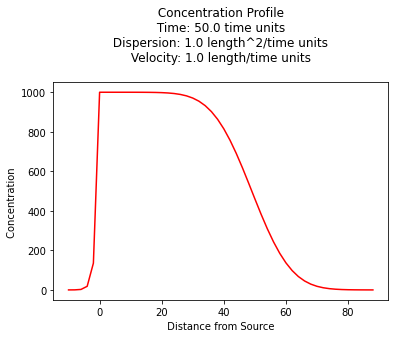

In [12]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype sauty function
#
def sauty(c_source,injection,porosity,space,time,dispersion,velocity):
    term0 = (c_source*injection)/(2.0*porosity*velocity)
    term1 = exp( 0.5*velocity*space/dispersion)
    term3 = exp(-0.5*velocity*abs(space)/dispersion)
    term4 = erfc(((abs(space)-velocity*time))/(2.0*sqrt(dispersion*time)))
    term5 = exp( 0.5*velocity*abs(space)/dispersion)
    term6 = erfc(((abs(space)+velocity*time))/(2.0*sqrt(dispersion*time)))
    sauty = term0*term1*(term3*term4-term5*term6)
    return(sauty)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
injection = 0.5   # injection volume rate
porosity = 0.5    # porosity
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [(i-5)*deltax for i in range(how_many_points)] # constructor notation plot some -x values
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = sauty(c_source,injection,porosity,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("sautyplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

## Concentration History

Its also quite reasonable to build a history (concentration versus time at some location) - the script is practically the same, except time is the variable instead of space.

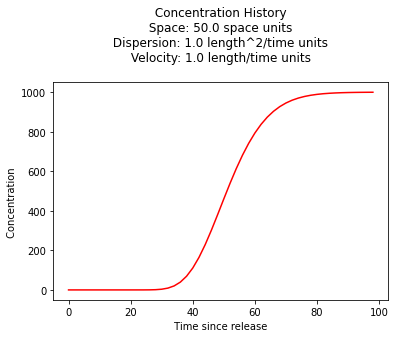

In [11]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def sauty(c_source,injection,porosity,space,time,dispersion,velocity):
    term0 = (c_source*injection)/(2.0*porosity*velocity)
    term1 = exp( 0.5*velocity*space/dispersion)
    term3 = exp(-0.5*velocity*abs(space)/dispersion)
    term4 = erfc(((abs(space)-velocity*time))/(2.0*sqrt(dispersion*time)))
    term5 = exp( 0.5*velocity*abs(space)/dispersion)
    term6 = erfc(((abs(space)+velocity*time))/(2.0*sqrt(dispersion*time)))
    sauty = term0*term1*(term3*term4-term5*term6)
    return(sauty)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 50.      # how far in X-direction to extend the plot
time  = 100.       # time since release
injection = 0.5   # injection volume rate
porosity = 0.5    # porosity
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = sauty(c_source,injection,porosity,space,t[i],dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

## References

1. [Sauty, J. (1980). “An analysis of hydrodispersive transfer in aquifers.” Water Resour. Res., 16(1), 145–158. ](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/wr016i001p00145) 